# Perspectieven en argumenten

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import plotly

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None

## Perspectief 1: Luchtvervuiling moet direct verminderd worden voor de bescherming van de gezondheid

Het is algemeen bekend dat plekken waar veel luchtvervuilende stoffen zijn grotere gezondheidsrisico's zijn. Zelfs in Nederland hebben we hiermee te maken. EenVandaag (2020) heeft onderzoek gedaan naar de hoeveelheid longkankerpatiënten bij Tata Steel. EenVandaag heeft uit cijfers van het Integraal Kankerinstituut Nederland (IKNL) gevonden dat in de buurt van de Tata Steel fabriek in Beverwijk tot wel 50% meer longkankerpatiënten voorkomen. Deze verhalen zorgen voor veel zorgen bij mensen in ernstig vervuilende gebieden, en organisaties zoals GreenPeace (2024) voeren protesten uit in de hoop dat Tata Steel sneller vergroend. 

In dit stuk zullen we door middel van het onderzoeken van data rondom sterftecijfers van longkanker en uitstoot van luchtvervuilende stoffen, het effect van luchtvervuiling laten zien en beargumenteren dat het snel verminderd moet worden.

### Argument: Luchtvervuiling veroorzaakt longkanker

Zoals eerder benoemd is het algemeen bekend dat luchtvervuiling longkanker veroorzaakt, maar het is ook belangrijk dat we dit verband duidelijk kunnen aantonen. In dit stuk zullen we doormiddel het visualiseren van de data die we hebben verzameld het verband tussen uitstoot en longkanker laten zien.

Eerst kunnen we kijken naar de luchtvervuiling van verschillende landen met sterk verschillende industrieën. De CIA (2017) heeft een publiek rapport waarin te vinden is hoeveel procent van het bruto binnenlands product van elk land naar welke sector gaat. De sectoren die hier worden bijgehouden zijn: industrie, diensten en agricultuur. Hiermee kunnen we drie landen kiezen die een absolute meerderheid hebben in verschillende sectoren. De gekozen landen zijn Angola met industrie, Argentinië met diensten en Sierra Leone met agricultuur.

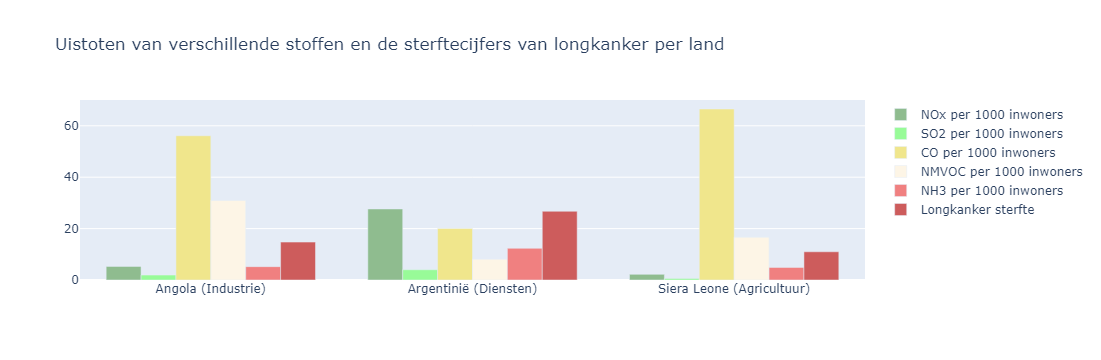

In [3]:
country_codes = ['AGO', 'ARG', 'SLE']
countries = ['Angola (Industrie)', 'Argentinië (Diensten)', 'Siera Leone (Agricultuur)']

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012_countries = df_2012[df_2012['Code'].isin(country_codes)]

trace = [
    go.Bar(
        x = countries,
        y = df_2012_countries['Nitrogen oxide (NOx)'],
        name = 'NOx per 1000 inwoners',
        marker_color='darkseagreen'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Sulphur dioxide (SO₂) emissions'],
        name = 'SO2 per 1000 inwoners',
        marker_color='palegreen'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Carbon monoxide (CO) emissions'],
        name = 'CO per 1000 inwoners',
        marker_color='khaki'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Non-methane volatile organic compounds (NMVOC) emissions'],
        name = 'NMVOC per 1000 inwoners',
        marker_color='oldlace'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Ammonia (NH₃) emissions'],
        name = 'NH3 per 1000 inwoners',
        marker_color='lightcoral'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['TBL rate'],
        name = 'Longkanker sterfte',
        marker_color='indianred'
    )]    
fig = go.Figure(trace)
fig.update_layout(barmode='group', title='Uistoten van verschillende stoffen en de sterftecijfers van longkanker per land')
fig.show()

> *Figure 1: Staafdiagram die de uitstoot van verschillende schadelijke stoffen laat zien en de hoeveelheid mensen die overleden zijn aan kanker.*

Opvallend zien we hier dat het land met de grootste dienstensector de hoogste sterftecijfers heeft voor longkanker. Dit kan mogelijk komen door de hoeveelheid stikstofoxide uitstoot dat Argentinië heeft. Als we deze staafdiagram aflezen lijkt stikstofoxide (NOx) en ammoniak (NH3) de belangrijkste veroorzaker van longkanker en koolstofmonoxide (CO) een verwaarloosbare rol. 

We kunnen een beter beeld krijgen als we gaan kijken naar de globale uitstoot en hoe dat invloed heeft gehad op de hoeveelheid mensen die wereldwijd is overleden aan kanker.

In [4]:
# Lees de CSV in
df = pd.read_csv('datasets/norm.csv')


# Bereken de totale uitstoot
df['Total emission'] = df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
                          'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
                          'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions']].sum(axis=1)


# Lijst van emissies
emissions = ['Total emission', 'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
            'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions',
            'Ammonia (NH₃) emissions']
afko_emissions = ['Totale uitstoot','NOx','SO2','CO', 'OC', 'NMVOC', 'BC', 'NH3']


# Bereken gemiddelden per jaar voor alle emissies
gem_uitstoot_per_jaar = df.groupby('Year')[['Total emission'] + emissions[1:]].mean().reset_index()


# Bereken gemiddelden voor TBL rate en daily smokers
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


# Voeg deze kolommen samen in een enkele dataframe
merged_df = gem_uitstoot_per_jaar.merge(gem_TBL, on='Year').merge(gem_smokers, on='Year')


# Maak de basis scatterplot
fig = go.Figure()


# Voeg de scatterplot voor de totale emissie toe
fig.add_trace(go.Scatter(
   x=merged_df['Year'],
   y=merged_df['Total emission'],
   mode='markers',
   marker=dict(
       size=15,
       color=merged_df['TBL rate'],
       colorscale='armyrose',
       showscale=True,
       colorbar=dict(title='TBL rate')
   ),
   name='Total emission'
))


# Maak een dropdownmenu voor de verschillende emissies
dropdown_buttons = [
   {
       'label': afko_emissions[i],
       'method': 'update',
       'args': [
           {'y': [merged_df[emissions[i]]]},
           {'title': f'Average {afko_emissions[i]} and TBL rate per year'}
       ]
   } for i in range(len(emissions))
]


# Update de layout van de figuur
fig.update_layout(
   title='Gemiddelde uitstoot en TBL rate per jaar',
   xaxis_title='Year',
   yaxis_title='Average emission',
   updatemenus=[{
       'buttons': dropdown_buttons,
       'direction': 'down',
       'showactive': True,
   }]
)


# Toon de figuur
fig.show()

> *Figure 2: De verschillende uitstoten per jaar, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden..*

Bovenstaande grafiek geeft de wereldwijde emissie uitstoot over de jaren 1990 tot 2012 weer voor 7 verschillende stoffen. De waarde van de wereldwijde emissie-uitstoot is bepaald door een gemiddelde van de emissie-uitstoten van 183 landen. De TBL rate is een schaal die de mate van gediagnosticeerde longkanker weergeeft. Voor deze waarde is tevens het gemiddelde genomen van de 183 betreffende landen. De sterkte van de TBL rate wordt in de grafiek aan de hand van een kleur aangeduid. Hoe rozer de kleur, hoe hoger de TBL rate en hoe groener de kleur, hoe lager de rate. De afnemende trend in de grafiek laat een daling in wereldwijde uitstoot zien door de jaren heen. Tevens is er een verandering in kleur te zien naarmate de jaren vorderen. Deze verandering duidt op een afname in TBL rate. Deze grafiek toont een correlatie tussen de wereldwijde emissie-uitstoot en de hoeveelheid gediagnosticeerde kanker. Deze correlatie suggereert een verband tussen lonkanker en uitstoot. Wel bevat de grafiek door het groeperen van data nog maar 22 datapunten. Er is niet met zekerheid te zeggen of de correlatie een daadwerkelijk verband aantoont.

## Perspectief 2: Het verder verminderen van luchtvervuiling is niet nodig.

Uit de vorige visualisaties bleek een duidelijke correlatie tussen luchtvervuiling en de TBL-rate. Echter, om een vollediger beeld te krijgen van de factoren die de TBL-rate beïnvloeden, moeten we ook andere mogelijke oorzaken in overweging nemen. Een belangrijke factor is roken, dat bekend staat om het vergroten van de kans op longziektes, waaronder longkanker (Longkanker Nederland, z.d.). Daarnaast is het ook nuttig om de mate van luchtvervuiling door de jaren heen weer te geven, om te kunnen analyseren of de regelgeving rondom het verminderen van luchtvervuiling al effectief genoeg zijn. Door deze aspecten te vergelijken, kunnen we beter begrijpen welke factoren de grootste invloed hebben op de TBL-rate, en of er mogelijk een sterkere relatie bestaat met roken dan met luchtvervuiling.

### Argument: Roken is een grotere factor in het krijgen van longkanker

We hebben gezien dat er een verband is tussen luchtvervuiling en longkanker, maar we weten niet hoe sterk dat verband is vergeleken met andere oorzaken. Een factor zoals roken kan misschien een nog grotere rol spelen. Als dat het geval zou zijn, is het waarschijnlijk beter om dat probleem aan te pakken dan de focus leggen op het verminderen van luchtvervuiling.

In [5]:
# Lees de CSV in
df = pd.read_csv('datasets/norm.csv')


# Bereken gemiddelden voor TBL rate en daily smokers
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


# Voeg deze kolommen samen in een enkele dataframe
merged_df =  gem_TBL.merge(gem_smokers, on='Year')


# Maak de basis scatterplot
fig = go.Figure()


# Voeg de scatterplot voor de totale emissie toe
fig.add_trace(go.Scatter(


   x=merged_df['Year'],
   y=merged_df['Percentage daily smokers'],
   mode='markers',
   marker=dict(
       size=15,
       color=merged_df['TBL rate'],
       colorscale='armyrose',
       showscale=True,
       colorbar=dict(title='TBL rate')
   ),
   name='Average percentage daily smokers per year'
))


fig.update_layout(
   title='Average Percentage of Daily Smokers and TBL rate per Year',
   xaxis_title='Year',
   yaxis_title='Percentage Daily Smokers'
)


# Toon de figuur
fig.show()


> *Figure 3: De gemiddelde percentage dagelijkse rokers, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden.*

Bovenstaande grafiek toont het gemiddelde percentage rokers van de 183 betreffende landen per jaar van de jaren 1990 tot 2012. De TBL rate wordt wederom weergegeven met een kleurschakering, waarbij een roze kleur een hoge TBL rate inhoudt en een groene kleur een lage TBL rate. De lijn in de grafiek geeft een sterke afname in wereldwijd rookgedrag weer, die gepaard gaat met een afname aan TBL rate. De grafiek toont een sterke correlatie tussen de TBL rate en het rookgedrag. In de volgende grafieken zal dit verband vergeleken worden met het verband tussen luchtvervuiling en TBL rate.

In [6]:
df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012['Mean Air Pollution'] = df_2012[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions']].mean(axis=1)


df_2012['Mean Air Pollution'] = df_2012['Mean Air Pollution']
df_2012['Percentage daily smokers'] = df_2012['Percentage daily smokers']

pearsons_r = df_2012['Mean Air Pollution'].corr(df_2012['Percentage daily smokers'])


fig = px.scatter(df_2012, x='Percentage daily smokers', y='Mean Air Pollution', size='TBL rate', hover_name='Code', color='TBL rate', size_max=35, color_continuous_scale='armyrose')


# Customize layout and tooltip text
fig.update_layout(
   title='Bubble plot met de gemiddelde uitstoot, hoeveelheid rokers en de longkanker sterfte in 2012',
   xaxis_title=' Smokers',
   yaxis_title='Mean Air Pollution per country',
    height=650
)


# Set text format for tooltips
fig.update_traces(textposition='top center')


# Show plot
fig.show()


> *Figure 4: Bubble plot met de gemiddelde uitstoot en de hoeveelheid rokers, de grote van elk punt geeft de hoeveelheid longkanker-doden aan.*

In deze bubble chart worden de mate van luchtvervuiling en het percentage van dagelijkse rokers tegen elkaar afgezet. Elke bubbel geeft een land in een jaar weer, de grootte en de kleur van de bubbels geven inzicht in de bijbehorende TBL-rate. Hoe rozer en groter de bubbel des te hoger de TBL-rate. Uit de chart kan worden opgemaakt dat het verband tussen roken en de TBL-rate aanzienlijk sterker is, dan het verband tussen mate van vervuiling en de TBL-rate.

In [7]:
# Load the CSV data
norm = pd.read_csv('datasets/norm.csv')


# Calculate the correlation matrix for numeric columns only
corr2 = norm.corr(numeric_only=True)


# Trim the correlation matrix
corr_trimmed2 = corr2.iloc[2:, 2:]


corr_rounded = corr_trimmed2.round(4)


# Create a heatmap
fig = px.imshow(corr_rounded,
                labels=dict(color="Correlation"),
                x=['NOx','SO2','CO', 'OC', 'NMVOC', 'BC', 'NH3', '% smokers', 'TBL rate'],
                y=['NOx','SO2','CO', 'OC', 'NMVOC', 'BC', 'NH3', '% smokers', 'TBL rate'],
                color_continuous_scale='armyrose',
                text_auto=True)


# Customize the title
fig.update_layout(title='Correlatiematrix van alle variabelen.',
                  xaxis_title='Columns',
                  yaxis_title='Columns')


fig.update_traces(text=corr_rounded.map(lambda x: f'{x:.3f}'))




# Show the figure
fig.show()

> *Figure 5: Heatmap van de correlatie tussen elk variabel.*

De focus ligt hierbij op de correlaties tussen de TBL rate met emissies van diverse broeikasgassen en het percentage mensen dat dagelijks rookt. De laatste kolom of onderste rij van de matrix toont hoe de TBL rate zich verhoudt tot elke andere variabele.
Een opvallende bevinding is de sterke correlatie van 0.64 tussen de TBL rate en het percentage dagelijkse rokers. Dit wijst op een duidelijk verband: naarmate meer mensen dagelijks roken, stijgt het aantal gevallen van TBL-kanker. Deze sterke correlatie suggereert dat rookgedrag een belangrijke risicofactor is voor de ontwikkeling van TBL-kanker. Naast roken, toont de matrix een matige correlatie van 0.39 tussen de TBL rate en de uitstoot van stikstofoxiden (NOx). Dit resultaat is interessant omdat stikstofoxiden bijdragen aan luchtverontreiniging en mogelijk verband houden met gezondheidsuitkomsten die de TBL rate kunnen beïnvloeden. Het roept op tot verdere verkenning van de impact van luchtverontreinigende stoffen op de gezondheid.

Hoewel koolstofmonoxide (CO) het meest uitgestoten broeikasgas is en elk jaar meer dan de helft van de totale uitstoot beslaat, vertoont het geen sterke directe correlatie met de TBL rate. Dit suggereert dat er naast de hoeveelheid CO-uitstoot andere factoren in het spel zijn bij de ontwikkeling van TBL-kanker. Mogelijk manifesteren de directe gezondheidseffecten van CO zich anders, of is de invloed op TBL-kanker indirecter van aard.
Hoewel roken de sterkste correlatie met TBL-kanker toont, suggereert de matige correlatie met NOx-emissies bijkomende risico's van milieuverontreiniging. 

### Argument: Luchtvervuiling neemt al af.

We hebben al laten zien dat het verband met luchtvervuiling en longkanker zwak is vergeleken met het verband tussen longkanker en roken. Maar het is ook de vraag of het nodig is om het verminderingsproces van vervuiling te moeten versnellen. We zagen namelijk in figuur 2 dat de globale uitstoot van luchtvervuilende stoffen al aan het afnemen zijn. Laten we kijken naar hoe de totale uitstoot in de wereld is veranderd.

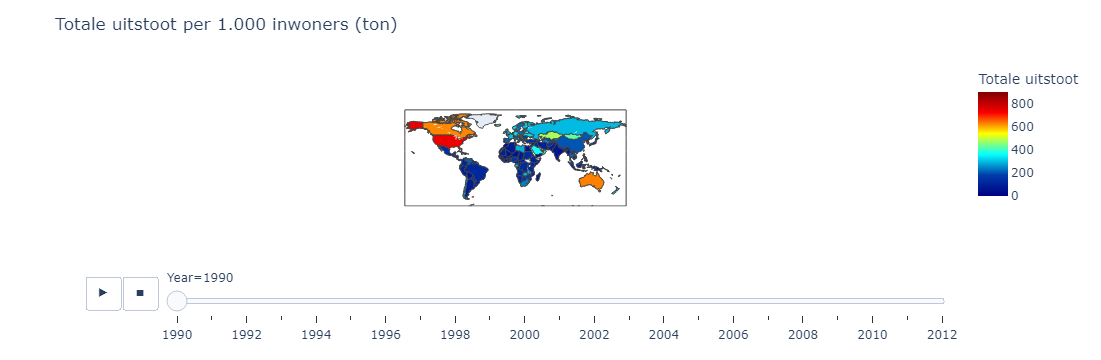

In [9]:
df = pd.read_csv('datasets/norm.csv')
df_total_emission = df.copy()
df_total_emission['Total emission'] = df_total_emission[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
                                                       'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions',
                                                       'Ammonia (NH₃) emissions']].sum(axis=1)

fig = px.choropleth(
                    df_total_emission,
                    locations="Code",
                    color="Total emission",
                    range_color=(df_total_emission['Total emission'].min(), 900), 
                    animation_frame="Year",
                    height=600,
                    color_continuous_scale=plotly.colors.sequential.Jet
)
fig.update_layout(title='Totale uitstoot per 1.000 inwoners (ton)',coloraxis_colorbar_title_text = 'Totale uitstoot')

fig.show()

> *Figure 6: Kaart met de gemiddelde uitstoot van luchtvervuilende stoffen*

We zien op deze kaart dat bijna alle landen hun uitstoot flink hebben verminderd in de periode van 1990 tot 2012. Er zijn een paar landen dat meer zijn gaan uitstoten, maar deze landen hebben geen grote invloed op het globale niveau. Voornamelijk de landen die de meeste luchtvervuiling hadden in 1990 zoals de Verenigde Staten en Canada hebben veel verminderd en liggen nu dicht bij de globale gemiddelde.

We zien met dit dus eigenlijk dat de huidige manieren om de luchtvervuilende uitstoot te verminderen al effectief werken. Het is natuurlijk mogelijk om de uitstoot nog meer te verminderen. Maar het is de vraag of dat het probleem rondom longkanker zal verhelpen.

## Conclusie
Al met al is er zowel voor luchtvervuiling als voor roken een verband gevonden met de TBL rate. Voor beide valt te beargumenteren dat ze van invloed zijn op de vorming van kanker. Toch is het gevonden verband tussen roken en TBL rate sterker. Bovendien is de emissie-uitstoot de laatste jaren al aan het verminderen.